### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading the data

In [4]:
raw_data = pd.read_csv('data/logistic_regression_basics.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [5]:
data = raw_data.copy()

In [6]:
data['Admitted'] = raw_data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### Defining variables

In [7]:
y = data['Admitted']
x1 = data['SAT']

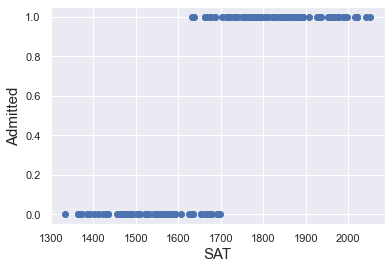

In [8]:
plt.scatter(x1,y, color='C0')
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('Admitted', fontsize=15)
plt.show()

### Regression

In [9]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [10]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.7992
Time:                        06:58:22   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Summary explanation

MLE (maximum likelihood estimation) - a function which estimates how likely it is that the model at hand describes the real unredlying relationship of the variables. The bigger the likelyhood function, the higher the probability that model is correct.
MLE tries to maximize the likelihood function. When it can no longer be improved it will stop the optimization.

Log-likelihood - it is almost always negative and the bigger value the better 

LL-Null (log likelihood-null) - the log-likelihood of a model which has no independent variables

LLR p-value (log likelihood ratio) - it measures if our model is statistically different from LL-Null (which is a useless model). Just like with p-value in linear regression closer to 0.00 the better. 

Pseudo R-squ (pseudo R-squared) - this is McFadden's R-squared. Good value is between 0.2 and 0.4. This can be useful when comparing variations of the same model. Do not use it to compare different models